# Gas Dynamics EDA: Stationarity

In this notebook we will provide an overview of Dr. Monnot's research on EIP 1559 and then perform analys on Filecoin's network to determine if Filecoin's base fee trends towards stationarity, as hypothesized by Dr. Barnabé Monnot.

Dr. Monnot's [EIP 1559 research](https://ethereum.github.io/abm1559/) is based on running [cadCAD](https://cadcad.org/) (or more accurately, [radCAD](https://github.com/CADLabs/radCAD)) models of scenarios to discover how gas prices will respond to different assumptions and market structures. He constructed a series of 5 technical notebooks (see [sources](#Sources) below) that explore first-price auctions, user behavior, and how Ethereum's gas economy would chain when moved to EIP 1559. In the section below we will summarize Dr. Monnot's research and describe applications toward Filecoin’s network.

[EIP 1559 was a (proposed at the time of Monnot’s writing) economic change to Ethereum’s gas economy with how the transaction fee market operates](https://ethereum.github.io/abm1559/notebooks/eip1559.html). It replaces the first-price auction with a variable gas price base to be paid by the user, along with a fee cap, and gas premium 'tip' provided to the block producer by the user. EIP 1559’s use supply and demand (the base fee increases to account for high demand and decreases with lower demand) with fixed block size. The base fee often converts to a value that ‘crowds out’ users to achieve the targeted block size. [Dr. Monnot’s research points to long-term stationery of the base fee. Shifts can occur that shift up or down the base fee, but over time the base fee tends towards stationary with ‘structural breaks’](https://ethereum.github.io/abm1559/notebooks/stationary1559.html) (Sir David Hendry’s econometrics research may be applicable here - will be addressed during the ‘traditional’ economics review). Dr. Monnot’s research is based on algorithmic game theory, and as such, he defines user actions in terms of payoffs. Accordingly, he presents the following function of determining an individual user's payoff, which determines a rise in the base fee. 

`Payoff = value − cost from waiting − transaction fee`

Dr. Monnot estimated cost for each actor waiting is lower in EIP 1559 since users estimate that they will be included in the next block and not wait for 5 blocks to get in. In the first-price auction, some users with high values but with no pressing time constraints might have been discouraged to join the pool. Now, these users don't expect to wait as much, and since their values are high, they don't mind bidding for a higher base fee either. In Dr. Monnot’s modeling, once we pass the initial instability (while the base fee is looking for its stationary value), all users receive a positive payoff. He thinks this is expected as once the base fee has increased/risen high enough to ‘weed out’ excess demand, actors are almost certainly guaranteed to be included in the next block so that actual wait time will always be less than their estimate. 

[Dr. Monnot’ studies strategic users as well, which he defines as actors who are trying to outbid the ‘cheapest user’(from the miner's point of view) that who was included in the previous block.](https://ethereum.github.io/abm1559/notebooks/strategicUser.html) In his simulations, he sets the fee cap of strategic users as that of the value of their transactions. He states that auctions are often assumed to be efficient when high-value actors obtain what they want, meaning, the item being auctioned goes to who wants it the most. When actors bid as they do in a first-price auction, the EIP 1559 gas economic is less efficient than the first-price auction for non-strategic actors. However, the EIP 1559 market becomes efficient for both actor types once the base fee reaches its stationary level.

[Dr. Monnot has a notebook discussing the alternative gas economy ‘escalator’ proposal first introduced by Dan Finlay. However, for our review here, we will skip this review as EIP 1559 was accepted.](https://ethereum.github.io/abm1559/notebooks/floatingEscalator.html)

Dr. Monnot's work is very helpful from a game theory perspective on how a user will interact with the gas economy. EIP 1559 removed the first-price auction, moving to a more supply and demand-driven approach, with actors becoming price takers the majority of the time, with their only decision being if they should perform a transaction or not.  The introduction of base fees has pushed oracles closer to objective market-clearing price estimates. Dr. Monnot’s simulations showing that the base fee will tend towards stationarity, with occasional ‘structural breaks’ based on supply/demand, provides a key insight for EDA: is Filecoin’s Gas Economy relatively stationary? If so, this is a key learning for building our DT’s behavioral model of the gas economy. Note: we tested Filecoin's base fee stationarity in [this notebook](https://blockscience.github.io/filecoin-metrics/notebooks/gas_eda_stationarity.html) and can conclude that the base fee was stationary for June and July, 2021. This finding would also drive the next part of our economic literature review: existing econometric measures for forecasting stationary prices with periodic structural breaks. 

#### Sources:

* https://ethereum.github.io/abm1559/notebooks/eip1559.html
* https://ethereum.github.io/abm1559/notebooks/stationary1559.html
* https://ethereum.github.io/abm1559/notebooks/strategicUser.html
* https://ethereum.github.io/abm1559/notebooks/floatingEscalator.html
* https://ethereum.github.io/abm1559/notebooks/transition1559.html
* https://filecoin.io/blog/posts/eip-1559-in-filecoin/



### `derived_gas_outputs` 
Obtained from [Sentinel's Data Dictionary](https://github.com/filecoin-project/sentinel/blob/master/docs/db.md)
Derived gas costs resulting from execution of a message in the VM.

|Name|Type|Nullable|Description|
|---|---|---|---|
|`actor_name`|`text`|NO|Human readable identifier for the type of the actor.|
|`base_fee_burn`|`text`|NO|The amount of FIL (in attoFIL) to burn as a result of the base fee. It is parent_base_fee (or gas_fee_cap if smaller) multiplied by gas_used. Note: successfull window PoSt messages are not charged this burn.|
|`cid`|`text`|NO|CID of the message.|
|`exit_code`|`bigint`|NO|The exit code that was returned as a result of executing the message. Exit code 0 indicates success. Codes 0-15 are reserved for use by the runtime. Codes 16-31 are common codes shared by different actors. Codes 32+ are actor specific.|
|`from`|`text`|NO|Address of actor that sent the message.|
|`gas_burned`|`bigint`|NO|The overestimated units of gas to burn. It is a portion of the difference between gas_limit and gas_used.|
|`gas_fee_cap`|`text`|NO|The maximum price that the message sender is willing to pay per unit of gas.|
|`gas_limit`|`bigint`|YES|A hard limit on the amount of gas (i.e., number of units of gas) that a message’s execution should be allowed to consume on chain. It is measured in units of gas.|
|`gas_premium`|`text`|NO|The price per unit of gas (measured in attoFIL/gas) that the message sender is willing to pay (on top of the BaseFee) to "tip" the miner that will include this message in a block.|
|`gas_refund`|`bigint`|NO|The overestimated units of gas to refund. It is a portion of the difference between gas_limit and gas_used.|
|`gas_used`|`bigint`|NO|A measure of the amount of resources (or units of gas) consumed, in order to execute a message.|
|`height`|`bigint`|NO|Epoch this message was executed at.|
|`method`|`bigint`|YES|The method number to invoke. Only unique to the actor the method is being invoked on. A method number of 0 is a plain token transfer - no method exectution.|
|`miner_penalty`|`text`|NO|Any penalty fees (in attoFIL) the miner incured while executing the message.|
|`miner_tip`|`text`|NO|The amount of FIL (in attoFIL) the miner receives for executing the message. Typically it is gas_premium * gas_limit but may be lower if the total fees exceed the gas_fee_cap.|
|`nonce`|`bigint`|YES|The message nonce, which protects against duplicate messages and multiple messages with the same values.|
|`over_estimation_burn`|`text`|NO|The fee to pay (in attoFIL) for overestimating the gas used to execute a message. The overestimated gas to burn (gas_burned) is a portion of the difference between gas_limit and gas_used. The over_estimation_burn value is gas_burned * parent_base_fee.|
|**`parent_base_fee`**|`text`|NO|**The set price per unit of gas (measured in attoFIL/gas unit) to be burned (sent to an unrecoverable address) for every message execution.**|
|`refund`|`text`|NO|The amount of FIL (in attoFIL) to refund to the message sender after base fee, miner tip and overestimation amounts have been deducted.|
|`size_bytes`|`bigint`|YES|Size in bytes of the serialized message.|
|`state_root`|`text`|NO|CID of the parent state root.|
|`to`|`text`|NO|Address of actor that received the message.|
|`value`|`text`|NO|The FIL value transferred (attoFIL) to the message receiver.|

Based off of this `derived_gas_outputs` data dictionary, `parent_base_fee` appears to be the actor's base fee that is hypothesized to be stationary. To test the hypothesis, we will download the second mean aggregated data for June and July 2021 and determine if `parent_base_fee` is stationary.

In [1]:
# import libraries
from sqlalchemy import create_engine
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from Cryptoeconomics_signal_processing import time_analysis 

%matplotlib inline

import warnings
warnings.simplefilter('ignore')



In [2]:
# load connection string
CONN_STRING_PATH = '../../config/sentinel_conn_string_andrew.txt'


with open(CONN_STRING_PATH, 'r') as fid:
    conn_string = fid.read()
    
# create database connection.
connection = create_engine(conn_string, pool_recycle=3600).connect()



In [13]:
QUERY = """
SELECT 
date_trunc('second', 
to_timestamp(height_to_unix(d.height))) AS timestamp,
AVG(CAST(gas_fee_cap AS FLOAT)) AS mean_gas_fee_cap,
AVG(CAST(gas_premium AS FLOAT))  as mean_gas_premium,
AVG(CAST(gas_limit AS FLOAT))  as mean_gas_limit,
AVG(CAST(gas_used AS FLOAT))  as mean_gas_used,
AVG(CAST(parent_base_fee AS FLOAT))  as mean_parent_base_fee,
AVG(CAST(base_fee_burn AS FLOAT))  as mean_base_fee_burn,
AVG(CAST(over_estimation_burn AS FLOAT))  as mean_over_estimation_burn,
AVG(CAST(gas_refund AS FLOAT))  as mean_gas_refund,
AVG(CAST(gas_burned AS FLOAT))  as mean_gas_burned
FROM derived_gas_outputs d
WHERE
to_timestamp(height_to_unix(d.height)) BETWEEN '2021-06-01' AND '2021-07-31'
GROUP BY
timestamp
"""
derived_gas_outputs_seconds = (pd.read_sql(QUERY, connection))
derived_gas_outputs_seconds

,timestamp,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned
0,2021-06-01 00:00:00+00:00,9.780685e+09,100706.952922,3.817361e+07,3.133535e+07,111.0,3.450383e+09,1.455183e+08,5.527290e+06,1.310976e+06
1,2021-06-01 00:00:30+00:00,5.766888e+09,103047.672956,3.901113e+07,3.181447e+07,103.0,3.208506e+09,1.281268e+08,5.952711e+06,1.243950e+06
2,2021-06-01 00:01:00+00:00,7.398405e+09,99976.861111,3.363575e+07,2.711274e+07,102.0,2.690713e+09,1.291310e+08,5.257021e+06,1.265990e+06
3,2021-06-01 00:01:30+00:00,3.868522e+09,102065.719647,3.715926e+07,3.069589e+07,106.0,3.203752e+09,1.002643e+08,5.517480e+06,9.458897e+05
4,2021-06-01 00:02:00+00:00,1.404787e+09,101765.362069,3.992063e+07,3.259273e+07,107.0,3.438982e+09,1.363375e+08,6.053718e+06,1.274183e+06
...,...,...,...,...,...,...,...,...,...,...
171561,2021-07-30 23:58:00+00:00,4.426913e+09,101181.316742,4.439651e+07,3.666616e+07,314487550.0,1.153105e+16,3.411073e+14,6.645707e+06,1.084645e+06
171562,2021-07-30 23:58:30+00:00,3.598823e+09,299046.955083,4.497437e+07,3.664396e+07,313948361.0,1.150431e+16,3.991834e+14,7.058918e+06,1.271494e+06
171563,2021-07-30 23:59:00+00:00,3.652686e+09,102577.654018,4.576084e+07,3.750292e+07,312325375.0,1.171311e+16,4.388254e+14,6.852901e+06,1.405027e+06
171564,2021-07-30 23:59:30+00:00,3.975116e+09,105496.724062,4.823598e+07,3.926423e+07,313544505.0,1.231108e+16,4.203608e+14,7.631075e+06,1.340673e+06


In [14]:
derived_gas_outputs_seconds.describe()

,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned
count,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05,1.715660e+05
mean,5.409295e+09,8.411077e+05,4.293277e+07,3.482210e+07,3.290731e+08,1.086363e+16,5.900828e+14,6.274522e+06,1.836149e+06
std,4.964858e+09,1.004076e+07,6.046677e+06,4.347247e+06,4.169786e+08,1.325603e+16,1.192443e+15,8.018780e+05,2.976089e+06
min,1.350829e+08,3.074865e+04,1.198402e+07,7.935290e+06,1.000000e+02,9.540023e+08,3.259816e+07,1.511386e+06,3.259816e+05
25%,2.294890e+09,1.052628e+05,3.882417e+07,3.163551e+07,1.008570e+08,3.689042e+15,1.441444e+14,5.687786e+06,1.216987e+06
50%,3.029554e+09,1.102066e+05,4.196388e+07,3.405595e+07,1.577407e+08,5.791319e+15,2.627207e+14,6.195479e+06,1.529256e+06
75%,7.743741e+09,2.768111e+05,4.621652e+07,3.747412e+07,4.206156e+08,1.368849e+16,6.416762e+14,6.778586e+06,2.037724e+06
max,4.005927e+11,1.496583e+09,3.333089e+08,1.403822e+08,6.273926e+09,2.103278e+17,1.886474e+17,2.970918e+07,3.120059e+08


We perform a quick time analysis to determine if time sampling is consistent, as we would expect when doing an aggregation. 

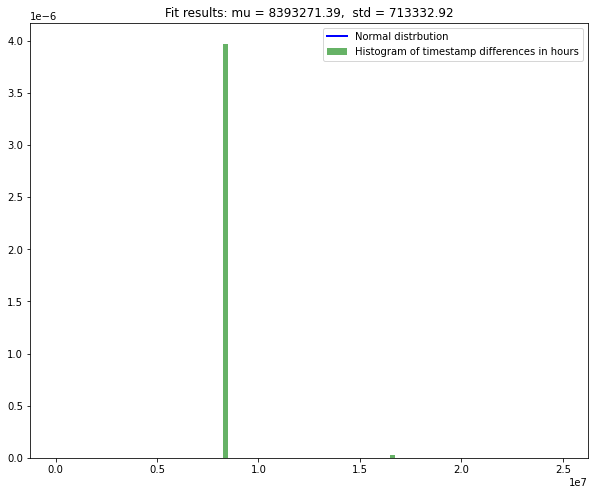

In [15]:
derived_gas_outputs_seconds['time'] = derived_gas_outputs_seconds['timestamp'].apply(lambda x: x.value)

time_analysis(derived_gas_outputs_seconds,'time')

As expected, the data is consistent.

In [16]:
# remove time datasets
timestamps = derived_gas_outputs_seconds.timestamp
del derived_gas_outputs_seconds['timestamp']
del derived_gas_outputs_seconds['time']
del derived_gas_outputs_seconds['timestampDiff']

array([[<AxesSubplot:title={'center':'mean_gas_fee_cap'}>,
        <AxesSubplot:title={'center':'mean_gas_premium'}>,
        <AxesSubplot:title={'center':'mean_gas_limit'}>],
       [<AxesSubplot:title={'center':'mean_gas_used'}>,
        <AxesSubplot:title={'center':'mean_parent_base_fee'}>,
        <AxesSubplot:title={'center':'mean_base_fee_burn'}>],
       [<AxesSubplot:title={'center':'mean_over_estimation_burn'}>,
        <AxesSubplot:title={'center':'mean_gas_refund'}>,
        <AxesSubplot:title={'center':'mean_gas_burned'}>]], dtype=object)

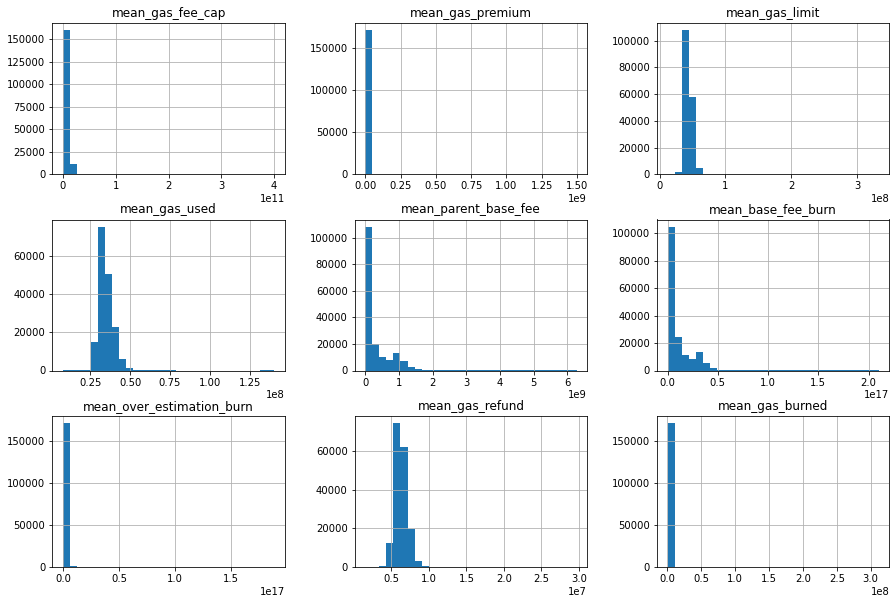

In [17]:
# plot histograms of the inputs
derived_gas_outputs_seconds.hist(bins=30, figsize=(15, 10))

To check for stationarity, as a hypothesis by Dr. Monnot, we will run the Augmented Dickey-Fuller test to ensure that our data is stationary (non-unit root - A unit root is a stochastic trend in a time series). The test's hypotheses are:

* $H_O: \textrm{Time series has a unit root}$
* $H_A: \textrm{Time series does not have unit root}$

In [18]:
for i in derived_gas_outputs_seconds.columns:
    print(i)
    result = adfuller(derived_gas_outputs_seconds[i].values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        decision = "fail to reject - unit root present"
    else:
        decision = "reject, no unit root present"
    print(decision)
    print('----------------------------------')

mean_gas_fee_cap
ADF Statistic: -7.111584
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_gas_premium
ADF Statistic: -37.504611
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_gas_limit
ADF Statistic: -13.195927
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_gas_used
ADF Statistic: -9.999438
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_parent_base_fee
ADF Statistic: -9.811843
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_base_fee_burn
ADF Statistic: -7.557320
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_over_estimation_burn
ADF Statistic: -12.104214
p-value: 0.000000
reject, no unit root present
----------------------------------
mean_gas_refund
ADF Statistic: -8.920796
p-value: 0.000000
reject, no unit root present
-------------------------------

## Conclusion

Based on the Augmented Dickey-Fuller, we can conclude that for June and July 2021, Filecoin's base fee was stationary, as hypothesizes by Dr. Monnot. This is a consequential finding as it allows us to tap into the rich econometric literature on stationary time series forecasting to inform how our Digital Twin forecasts base fee. 